### Import Libraries

In [1]:
#Importing Libraries
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualizagtion libraries(Matplotlib)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data description checkout

In [2]:
#Loading Dataset using variable name usahousing
usahousing=pd.read_csv("USA_Housing.csv")

In [3]:
usahousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
usahousing.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [5]:
#Usa_data set information
usahousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


**Statistics Analysis**

In [6]:
#Description of the given dataset
usahousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
#dataset columns"
usahousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

### EDA portion

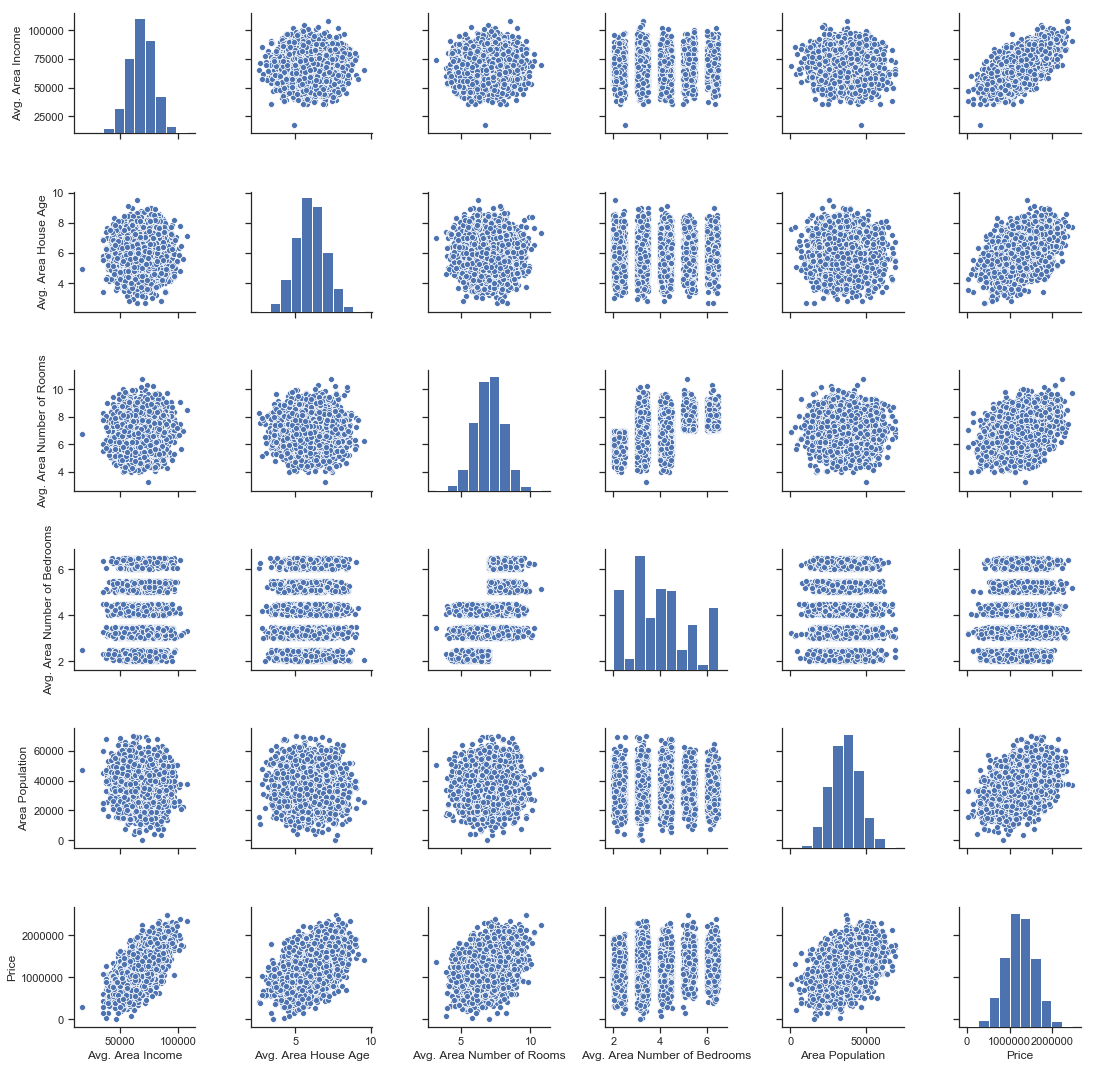

In [8]:
#Multivariate Analysis
# Let's create some plots to analyse the data
sns.set(style="ticks", color_codes=True)
sns.pairplot(usahousing)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

** Avg. Area Income is most correlated feature with house 'price'**

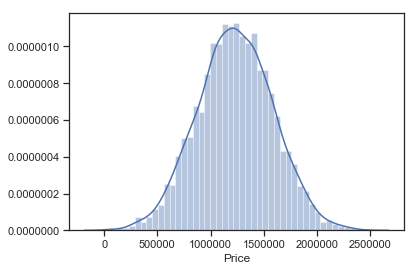

In [9]:
##seaborn distplot shows a histogram with a line on it(numerical columns)
## It shows a univariate distribution of observations
sns.distplot(usahousing['Price'])
plt.show()

**Check the data correlation using heatmap**

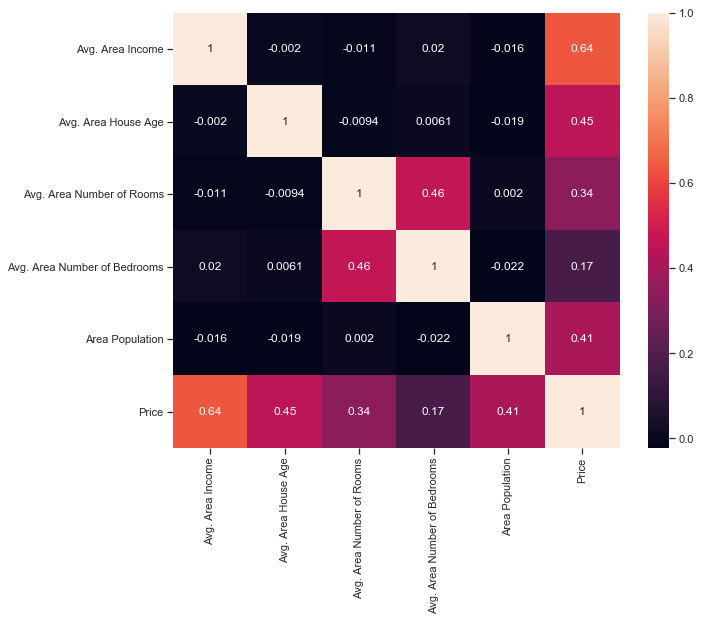

In [10]:
plt.figure(figsize=[10,8])
sns.heatmap(usahousing.corr(), annot=True)
plt.show()

###  Training and Testing Data
**Now we have explored the data abit, let's go ahead and split the data into an X array that contains 
the features to train on and a y array with the target variable.Set a variable X equal to the numerical features of the datasets and a variable y equal to the "price" column.**

In [11]:
X=usahousing.drop(['Price','Address'], axis=1)
y=usahousing['Price']

## Train Test Split
Now let's split the data into a training set and testing set. We will train out model on the training set and use the test set to evaluate the model

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
Xtrain, Xtest, ytrain, ytest=train_test_split(X,y, test_size=0.30, random_state=40)

## **Creating and training the base model**

Now it's time to train our model on our training data.

In [14]:
from sklearn.linear_model import LinearRegression

Lm=LinearRegression()
Lm.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## **Model Evaluation**

Now we have to evaluate the model by checking out its co-eficients and how we can interpret them.

In [15]:
#print the intercept
print(Lm.intercept_)

-2629944.8436879385


In [16]:
coeff=pd.DataFrame(Lm.coef_, X.columns, columns=['Coefficient'])
coeff

,Coefficient
Avg. Area Income,21.462056
Avg. Area House Age,165486.469509
Avg. Area Number of Rooms,121327.447536
Avg. Area Number of Bedrooms,1511.548745
Area Population,15.089801


Interprteting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg.Area Income** is associated with an **increase of \$21.46**.
    
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$165486.47**.

- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$121327.45**.

- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms	** is associated with an **increase of \$1511.55**.

- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.09**

Does this make sense? Probably not because I made up this data. If you want real data to repeat this sort of analysis, check out the [boston dataset](`):

    from sklearn.datasets import load_boston
    boston = load_boston()
    print(boston.DESCR)
    boston_df = boston.data

## **Predictions from our model**

Now that we have fit our model, let's grab ppredictions off the test values!

**Use lm.predict() to predict off the X_test set of the data.**

Calculating the Accuracy score, Mean Squared Error, and the Root Mean Squared Error.

In [17]:
y_prediction=Lm.predict(Xtest)

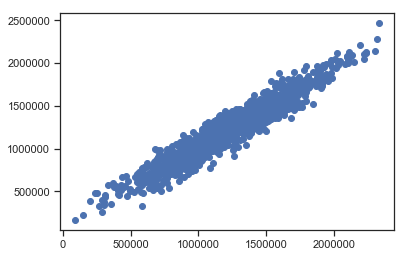

In [20]:
plt.scatter(ytest,y_prediction)
plt.show()

### **Residual Histogram**

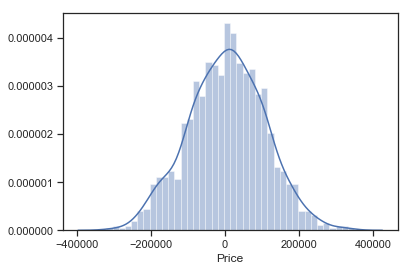

In [28]:
sns.distplot((ytest-y_prediction), bins=40)

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.


In [36]:
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,mean_absolute_error

In [37]:
score=Lm.score(Xtest,ytest)
mse=mean_squared_error(ytest,y_prediction)

In [43]:
print("Test Accuracy")
print("The test accuracy is {}".format(score))
print("The mean_squared_error of test is {}".format(mse))
print("r2_score=".format(r2_score(ytest,y_prediction)))
print("The mean_absolute_error of test is {}".format(mean_absolute_error(ytest,y_prediction)))
print("The test RMSE for regression is {}".format(np.sqrt(mse)))

Test Accuracy
The test accuracy is 0.9130127917669941
The mean_squared_error of test is 10758090089.10668
r2_score=
The mean_absolute_error of test is 82850.98683806648
The test RMSE for regression is 103721.21330329047


**Thank you. This is the final.**

**Further we have analysed with different algorithms to get the best model accuracy in different datasets.** 